# Homework #3
## Introduction to deep learning


This colaboratory contains Homework #3 which is due **October 20 midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**
## Submission's rules:

1.   Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.


##List of Homework's exercises:

1.   [Ex1](#scrollTo=4YtaQwccjrAL) - 4 points
2.   [Ex2](#scrollTo=tOfgGIUtIizt) - 4 points
3.   [Ex3](#scrollTo=rt6Fuo28nQkd) - 2 points
4.   [Bonus 1](#scrollTo=wT-4aQqUtDU7) - 2 points
5.   [Bonus 2](#scrollTo=lEW4oyQhnRQA) - 2 points


In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

Here we will define few functions that will help us visualise classifiers that we are going to build in this class. Don't worry if you don't understand this code completely.

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# for very shallow models
def plot_classifier(X, y, W, b):
  st = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, st),
                       np.arange(y_min, y_max, st))
  Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# for two-layer network
def plot_neural_network(X, y, W,b ,W2, b2):
  st = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, st),
                       np.arange(y_min, y_max, st))
  Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [3]:
N = 100 # number of points per class
D = 2 # number of features (dimensions)
K = 2 # number of classes (purple and red circles)
X = np.zeros((N*K,D)) # data matrix (each row = single example)
num_examples = X.shape[0]
y = np.zeros((N*K, 1), dtype='int') # class labels

In [4]:
# Creating spiral data points
np.random.seed(1111)

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix, 0] = j

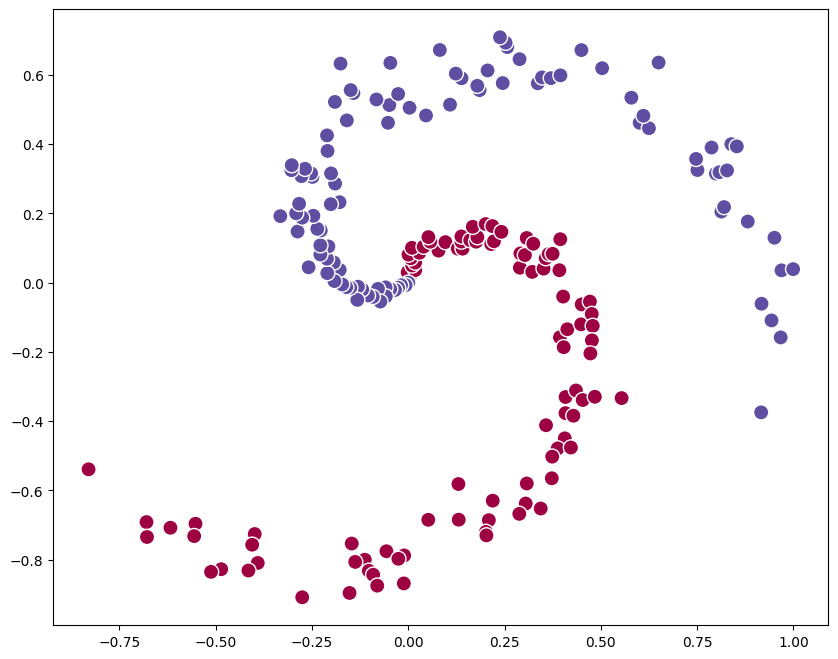

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
plt.show()

For our implementation we would need to transform the vector of correct labels `y` into one hot encoded matrix, let's call it `truth`. Сreating `truth` as one-hot encoded labels (`y`)

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
truth = enc.fit_transform(y).toarray()

# first column is for red
# second is for purple class

## Homework exercise 1 (4 points): three-layer network
 <font color='red'>In the class we have obtained ~94% using 2-layer neural network when classifying points in spiral. This is surely not good enough for us. Hence, let's make a few tweaks in attempt to reach higher performance.</font>

<font color='red'>**PS: Before you start working on this task, please read it in its entirety!**</font>

<font color='red'> **(a)** Based on the code we have written in the practice session, build a new 3-layer neural network, consiting two hidden layers (each of size `h`) and one output layer. Using ChatGPT/Gemini will likely result in architectures which are substantially different from what we intended, so try to follow the code provided in the practice session. Use `tanh` as an activation function for the hidden layers. Compute both feedforward and backpropagation paths to update the model weights and produce predictions (you might want to check out [this post](https://medium.com/@Coursesteach/deep-learning-part-25-derivatives-of-activation-functions-4bbd7c7c7a1c) about the derivatives of the most popular activation functions). Answer a question at the end of this subtask. **(1.5 points)**. </font>

In [7]:
np.random.seed(111)
num_examples = X.shape[0]

# Initialize parameters randomly
h = 100  # Size of hidden layer
W = np.random.randn(D,h)
b = np.zeros((1,h))
W2 = np.random.randn(h,h)
b2 = np.zeros((1,h))
W3 = np.random.randn(h,K)
b3 = np.zeros((1,K))

# Some hyperparameters
step_size = 1e-0

# Gradient descent loop
##### YOUR CODE STARTS #####
for i in range(2000):

  # Forward path
  hidden_layer = np.tanh(np.dot(X, W) + b)
  hidden_layer_2 = np.tanh(np.dot(hidden_layer, W2) + b2) # NB, tanh activation
  answers = np.dot(hidden_layer_2, W3) + b3

  # Compute the error
  total_error = np.sum((truth - answers)**2)/2
  total_error = total_error / num_examples

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))

  # Compute the gradient on answers
  dTEdP = answers - truth
  dTEdP = dTEdP / num_examples

  # Backpropagate the gradient to the parameters
  dW3 = np.dot(hidden_layer_2.T, dTEdP)
  db3 =  np.sum(dTEdP, axis = 0, keepdims=True)

  dH2 = np.dot(dTEdP, W3.T)
  dH2[hidden_layer_2 <= 0] = 0

  # then backprop into W2 and b2
  dW2 = np.dot(hidden_layer.T, dH2)
  db2 = np.sum(dH2, axis=0, keepdims=True)

  dH = np.dot(dH2, W2.T)
  dH[hidden_layer <= 0] = 0

  # finally into W,b
  dW = np.dot(X.T, dH)
  db = np.sum(dH, axis=0, keepdims=True)

  # Perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2
  W3 += -step_size * dW3
  b3 += -step_size * db3

  ##### YOUR CODE ENDS #####

iteration 0: loss 6.816154e+01


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-7-2ef7e75b3b61>:26: RuntimeWarning: overflow encountered in square
  total_error = np.sum((truth - answers)**2)/2


iteration 100: loss inf


<ipython-input-7-2ef7e75b3b61>:59: RuntimeWarning: invalid value encountered in add
  W3 += -step_size * dW3
<ipython-input-7-2ef7e75b3b61>:60: RuntimeWarning: invalid value encountered in add
  b3 += -step_size * db3


iteration 200: loss nan
iteration 300: loss nan
iteration 400: loss nan
iteration 500: loss nan
iteration 600: loss nan
iteration 700: loss nan
iteration 800: loss nan
iteration 900: loss nan
iteration 1000: loss nan
iteration 1100: loss nan
iteration 1200: loss nan
iteration 1300: loss nan
iteration 1400: loss nan
iteration 1500: loss nan
iteration 1600: loss nan
iteration 1700: loss nan
iteration 1800: loss nan
iteration 1900: loss nan


<font color='red'> If you have implemented everything correctly, you should have encountered a problem :)
Below name the problem and describe why it happens: </font>

<font color='red'> Your answer: </font> During the training process, the model encountered overflow and NaN values due to the handling of large weight values or inappropriate step sizes

**Problem :** infinity (inf) A primary issue lies in the matrix arithmatic operations, where the weights (W, W2, W3) are initialized with excessively large values. As training progresses, these values amplify further, leading to numerical instability. Additionally, the tanh activation function, particularly when applied to large values, can contribute to the problem by generating excessively large gradients.

 NAN (not a Number) The occurrence of overflow can result in NaN values within the network due to operations involving infinities. Once a NaN appears, it can propagate throughout the network, ultimately affecting the loss function and gradients.

<font color='red'> **(b)** Fix the issue you have encountered above using one of the ideas that we have discussed in the lecture. Please, insert and run the updated code in the cell below. **(1.5 points)**. </font>

In [8]:
np.random.seed(111)
num_examples = X.shape[0]

# Initialize parameters randomly
h = 100  # Size of hidden layer
W = np.random.randn(D,h)
b = np.zeros((1,h))
W2 = np.random.randn(h,h)
b2 = np.zeros((1,h))
W3 = np.random.randn(h,K)
b3 = np.zeros((1,K))

# Some hyperparameters
step_size = 1e-2

# Gradient descent loop
##### YOUR CODE STARTS #####
for i in range(2000):

  # Forward path
  hidden_layer = np.tanh(np.dot(X, W) + b)
  hidden_layer_2 = np.tanh(np.dot(hidden_layer, W2) + b2) # NB, tanh activation
  answers = np.dot(hidden_layer_2, W3) + b3

  # Compute the error
  total_error = np.sum((truth - answers)**2)/2
  total_error = total_error / num_examples

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))

  # Compute the gradient on answers
  dTEdP = answers - truth
  dTEdP = dTEdP / num_examples

  # Backpropagate the gradient to the parameters
  dW3 = np.dot(hidden_layer_2.T, dTEdP)
  db3 =  np.sum(dTEdP, axis = 0, keepdims=True)

  dH2 = np.dot(dTEdP, W3.T)
  dH2[hidden_layer_2 <= 0] = 0

  # then backprop into W2 and b2
  dW2 = np.dot(hidden_layer.T, dH2)
  db2 = np.sum(dH2, axis=0, keepdims=True)

  dH = np.dot(dH2, W2.T)
  dH[hidden_layer <= 0] = 0

  # finally into W,b
  dW = np.dot(X.T, dH)
  db = np.sum(dH, axis=0, keepdims=True)

  # Perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2
  W3 += -step_size * dW3
  b3 += -step_size * db3

  ##### YOUR CODE ENDS #####

iteration 0: loss 6.816154e+01
iteration 100: loss 6.448479e-01
iteration 200: loss 3.829364e-01
iteration 300: loss 5.856485e-01
iteration 400: loss 2.828746e-01
iteration 500: loss 3.748979e-01
iteration 600: loss 2.687241e-01
iteration 700: loss 1.430532e-01
iteration 800: loss 1.149968e-01
iteration 900: loss 1.805819e-01
iteration 1000: loss 1.397869e-01
iteration 1100: loss 1.334179e-01
iteration 1200: loss 1.117608e-01
iteration 1300: loss 9.203665e-02
iteration 1400: loss 7.080067e-02
iteration 1500: loss 6.129065e-02
iteration 1600: loss 5.967702e-02
iteration 1700: loss 6.953809e-02
iteration 1800: loss 7.435697e-02
iteration 1900: loss 7.117160e-02


<font color='red'> If it worked fine, evaluate your model running the code below. </font>

In [9]:
#evaluate training set accuracy
hidden_layer = np.tanh(np.dot(X, W) + b)
hidden_layer_2 = np.tanh(np.dot(hidden_layer, W2) + b2) # NB, tanh activation
answers = np.dot(hidden_layer_2, W3) + b3 # Note, no activation function for the last layer!
predicted_class = np.argmax(answers, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y[:,0])))

training accuracy: 0.97


<font color='red'> You should get about 98% of accuracy or more... </font>



<font color='red'> **(c)** Update function `plot_deep_neural_network` by altering the code of `plot_neural_network` to visualise obtained 3-layer network with `tanh` activation function. Visualise obtained decision boundary. How did it change comparing to the one we have observed by 2-layer models? Do you think you would be able to easily get 100% for this data? **(1 point)** </font>



In [10]:
def plot_deep_neural_network(X, y, W, b ,W2, b2, W3, b3):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  ##### YOUR CODE STARTS #####
  Z = np.tanh(np.tanh(np.c_[xx.ravel(), yy.ravel()]@ W + b)@ W2 + b2)@ W3 + b3
  ##### YOUR CODE ENDS #####

  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

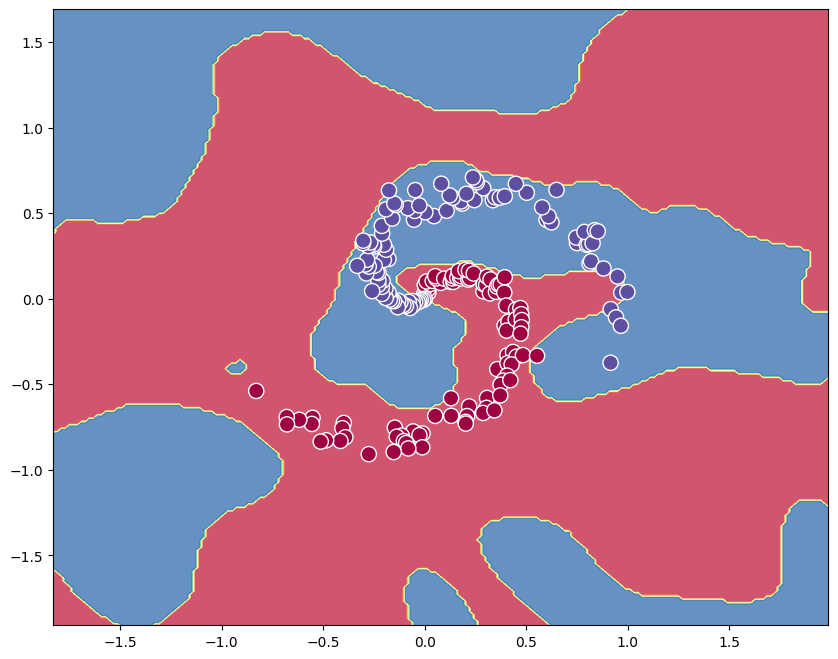

In [11]:
# plot the resulting classifier
plot_deep_neural_network(X, y, W, b, W2, b2, W3, b3)

<font color='red'> Answer to **(c)**: </font>



## Homework exercise 2 (4 points): balancing model complexity and performance
<font color='red'> In this exercise, you’re going to explore how we can balance model size and performance in neural networks. The goal of this exercise is to help you understand the relationship between model complexity, resource usage, and performance.  </font>



In [12]:
# A bit of setup again
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:50000]
y_train = y_train[:50000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [13]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std


<font color='red'> **(a)** Take a CNN model created for CIFAR-10 from the practice session and copy it below.

<font color='red'>Compute and report the following properties:
<font color='red'>
<ol>
  <li>Number of model parameters</li>
  <li>Memory used by the model parameters
  <li>Training and inference times</li>
  <li>Accuracy on the training and test set</li>
</ol>
</font>

<font color='red'> Additionally, visualize the learning curves (loss and accuracy over epochs). (**0.5 points**)

</font>

In [14]:
##### YOUR CODE STARTS #####
##### YOUR CODE STARTS #####
import time
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)
f2 = Flatten()(d2) # tensor into vector
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3)
p = Activation('softmax')(z)

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()
# Fit the model; returns History object
start_time=time.time()
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)
end_time = time.time()
training_time=end_time - start_time
##### YOUR CODE ENDS #####
##### YOUR CODE ENDS #####

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,910 (2.79 MB)

 Trainable params: 731,582 (2.79 MB)

 Non-trainable params: 328 (1.28 KB)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3997 - loss: 1.7345 - val_accuracy: 0.6158 - val_loss: 1.0918
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5959 - loss: 1.1502 - val_accuracy: 0.6722 - val_loss: 0.9532
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6398 - loss: 1.0300 - val_accuracy: 0.6788 - val_loss: 0.9068
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6621 - loss: 0.9589 - val_accuracy: 0.6718 - val_loss: 0.9391
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6850 - loss: 0.8846 - val_accuracy: 0.6916 - val_loss: 0.8922
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6998 - loss: 0.8520 - val_accuracy: 0.6966 - val_loss: 0.8480
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7108 - loss: 0.8154 - val_accuracy: 0.7092 - val_loss: 0.8311
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7316 - loss: 0.7609 - val_accuracy: 

Text(0.5, 1.0, 'Accuracy')

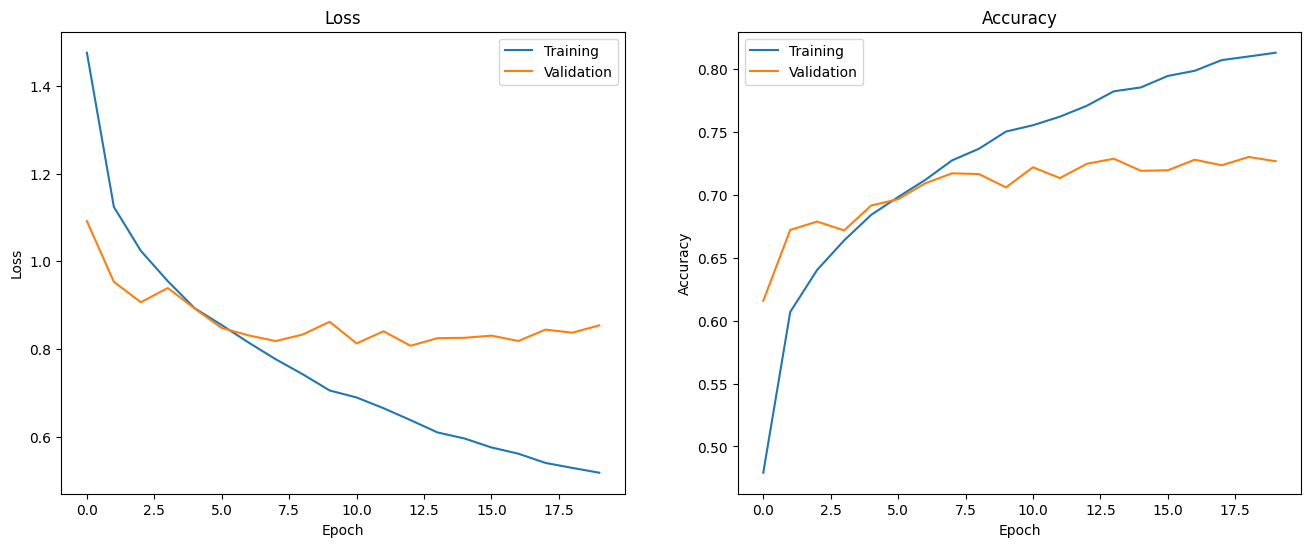

In [15]:
# Visualize the learning curves
##### YOUR CODE STARTS #####
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
##### YOUR CODE ENDS #####

In [16]:
# Report the properties

train_loss, train_acc = model.evaluate(X_train_norm, y_train)
test_loss, test_acc = model.evaluate(X_test_norm, y_test)

start_inference_time = time.time()
_ = model.predict(X_test[:1000])
end_inference_time = time.time()
inference_time = (end_inference_time - start_inference_time) / 1000
###### YOUR CODE STARTS #####
print(f"Number of parameters: {model.count_params()}")
print(f"Memory usage for the model parameters: {(model.count_params() * 4)/(1024**2):.2f} MB")
print(f"Training time: {training_time:.2f}")
print(f"Inference time: {inference_time:.6f}")
print(f"Accuracy on the training set: {train_acc * 100:.2f}%")
print(f"Accuracy on the test set: {test_acc * 100:.2f}%")
##### YOUR CODE ENDS #####

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9410 - loss: 0.2253
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7260 - loss: 0.8547
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Number of parameters: 731910
Memory usage for the model parameters: 2.79 MB
Training time: 110.14
Inference time: 0.000838
Accuracy on the training set: 92.19%
Accuracy on the test set: 72.27%


<font color='red'> **(b)** Now, create a new model with approximately twice the number of parameters as the previous one, aiming for higher accuracy. You might consider adding layers, or tweaking the existing ones. Report the same properties as in **(a)**. Do not forget to visualize the learning curves. (**1.5 points**) </font>

In [17]:
##### YOUR CODE STARTS #####
# you might want to use several cells
##### YOUR CODE STARTS #####
# you might want to use several cells


# Define the model with approximately double the number of parameters
x = Input(shape=(32, 32, 3))
c1 = Conv2D(64, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(64, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)
c3 = Conv2D(128, (3, 3), strides=(1, 1), padding="same")(d2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)
p3 = MaxPooling2D(pool_size=2)(a3)
d3 = Dropout(rate=0.25)(p3)
f3 = Flatten()(d3)
h4 = Dense(200)(f3)
b4 = BatchNormalization()(h4)
a4 = Activation('relu')(b4)
d4 = Dropout(rate=0.5)(a4)
z = Dense(10)(d4)
p = Activation('softmax')(z)

# Create the model
model2 = Model(inputs=x, outputs=p)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model2.summary()

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train2 = X_train.astype('float32') / 255.0
X_test2 = X_test.astype('float32') / 255.0

# Training the model
start_time = time.time()
history2 = model2.fit(X_train2, y_train, batch_size=64, epochs=20, validation_split=0.1)
end_time = time.time()
##### YOUR CODE ENDS #####
##### YOUR CODE ENDS #####

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │       1,254,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,371,010 (5.23 MB)

 Trainable params: 1,370,098 (5.23 MB)

 Non-trainable params: 912 (3.56 KB)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.4252 - loss: 1.6762 - val_accuracy: 0.5142 - val_loss: 1.3327
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.6295 - loss: 1.0538 - val_accuracy: 0.6336 - val_loss: 1.0263
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6857 - loss: 0.8947 - val_accuracy: 0.6928 - val_loss: 0.8542
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7169 - loss: 0.8053 - val_accuracy: 0.7364 - val_loss: 0.7466
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7425 - loss: 0.7340 - val_accuracy: 0.7522 - val_loss: 0.7167
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7613 - loss: 0.6833 - val_accuracy: 0.7526 - val_loss: 0.7060
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7768 - loss: 0.6394 - val_accuracy: 0.7782 - val_loss: 0.6412
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7947 - loss: 0.5847 - val

Text(0.5, 1.0, 'Accuracy')

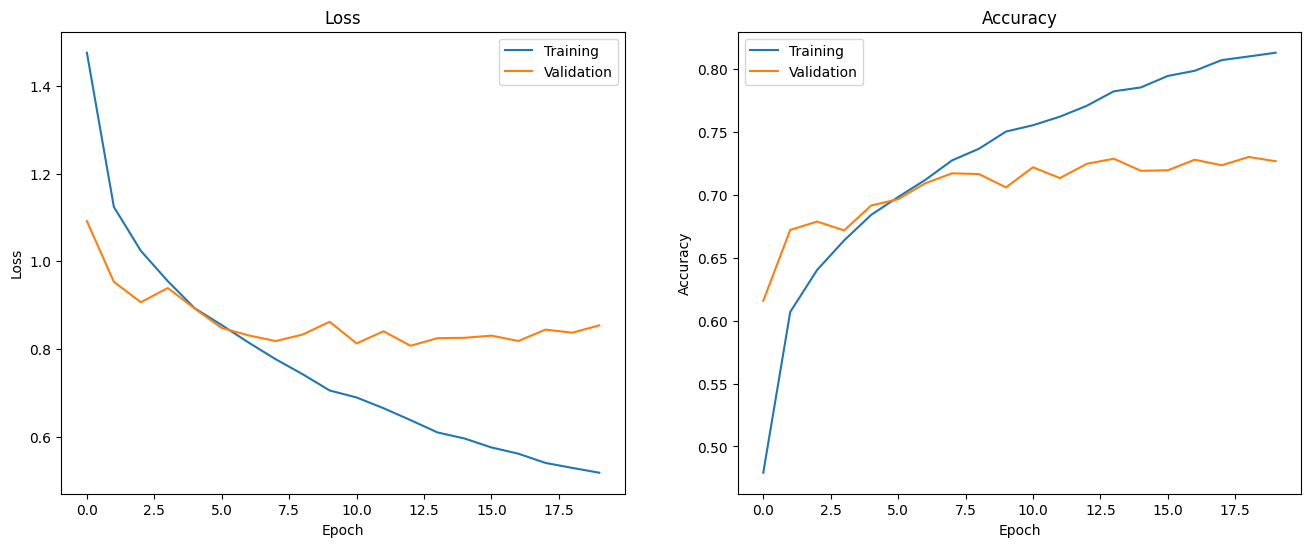

In [18]:
# Visualize the learning curves
##### YOUR CODE STARTS #####
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
##### YOUR CODE ENDS #####

In [19]:
# Report the properties
###### YOUR CODE STARTS #####
train_loss2, train_acc2 = model2.evaluate(X_train2, y_train)
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test)

start_inference_time = time.time()
_ = model2.predict(X_test2[:1000])
end_inference_time = time.time()
inference_time = (end_inference_time - start_inference_time) / 1000

print(f"Number of parameters: {model2.count_params()}")
print(f"Memory usage for the model parameters: {(model2.count_params() * 4)/(1024**2):.2f} MB")
print(f"Training time: {training_time:.2f}")
print(f"Inference time: {inference_time:.6f}")
print(f"Accuracy on the training set: {train_acc2 * 100:.2f}%")
print(f"Accuracy on the test set: {test_acc2 * 100:.2f}%")
##### YOUR CODE ENDS #####

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9575 - loss: 0.1615
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7932 - loss: 0.6226
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Number of parameters: 1371010
Memory usage for the model parameters: 5.23 MB
Training time: 110.14
Inference time: 0.000964
Accuracy on the training set: 94.32%
Accuracy on the test set: 79.49%


<font color='red'> **(c)** Finally, create a third model with approximately the same number of parameters as the initial baseline model, but aim for accuracy that matches or even exceeds the second (larger) model. Report the same properties and visualize the learning curves for this model. (**1.5 points**)

HINT: To get higher accuracy, focus on applying techniques you have learned from the lecture and practice sessions.
</font>

In [20]:
##### YOUR CODE STARTS #####
# you might want to use several cells
##### YOUR CODE STARTS #####
# you might want to use several cells
x = Input(shape=(32, 32, 3))
c1 = Conv2D(64, (3, 3), strides=(1, 1), padding="same")(x)  # Increased filters to 64
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(64, (3, 3), strides=(1, 1), padding="valid")(a1)  # Increased filters to 64
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)

# Adding an additional convolutional layer
c3 = Conv2D(128, (3, 3), strides=(1, 1), padding="same")(d2)  # New conv layer with 128 filters
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)
p3 = MaxPooling2D(pool_size=2)(a3)
d3 = Dropout(rate=0.25)(p3)

f3 = Flatten()(d3)  # Flatten layer after additional conv
h4 = Dense(200)(f3)
b4 = BatchNormalization()(h4)
a4 = Activation('relu')(b4)
d4 = Dropout(rate=0.5)(a4)
z = Dense(10)(d4)
p = Activation('softmax')(z)

model3 = Model(inputs=x, outputs=p)
model3.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model3.summary()


# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train3 = X_train.astype('float32') / 255.0
X_test3 = X_test.astype('float32') / 255.0

# Fit the model; returns History object
start_time=time.time()
history = model3.fit(X_train3, y_train, batch_size=64, epochs=20, validation_split=0.1)
end_time = time.time()
training_time=end_time - start_time
##### YOUR CODE ENDS #####
##### YOUR CODE ENDS #####

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │       1,254,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,371,010 (5.23 MB)

 Trainable params: 1,370,098 (5.23 MB)

 Non-trainable params: 912 (3.56 KB)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.4199 - loss: 1.6767 - val_accuracy: 0.5496 - val_loss: 1.2188
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6402 - loss: 1.0293 - val_accuracy: 0.6248 - val_loss: 1.0560
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6831 - loss: 0.8956 - val_accuracy: 0.7386 - val_loss: 0.7713
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7170 - loss: 0.8026 - val_accuracy: 0.7052 - val_loss: 0.8061
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7354 - loss: 0.7461 - val_accuracy: 0.7096 - val_loss: 0.8372
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7597 - loss: 0.6812 - val_accuracy: 0.7588 - val_loss: 0.6897
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7744 - loss: 0.6473 - val_accuracy: 0.7348 - val_loss: 0.7529
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7931 - loss: 0.5927 - val

Text(0.5, 1.0, 'Accuracy')

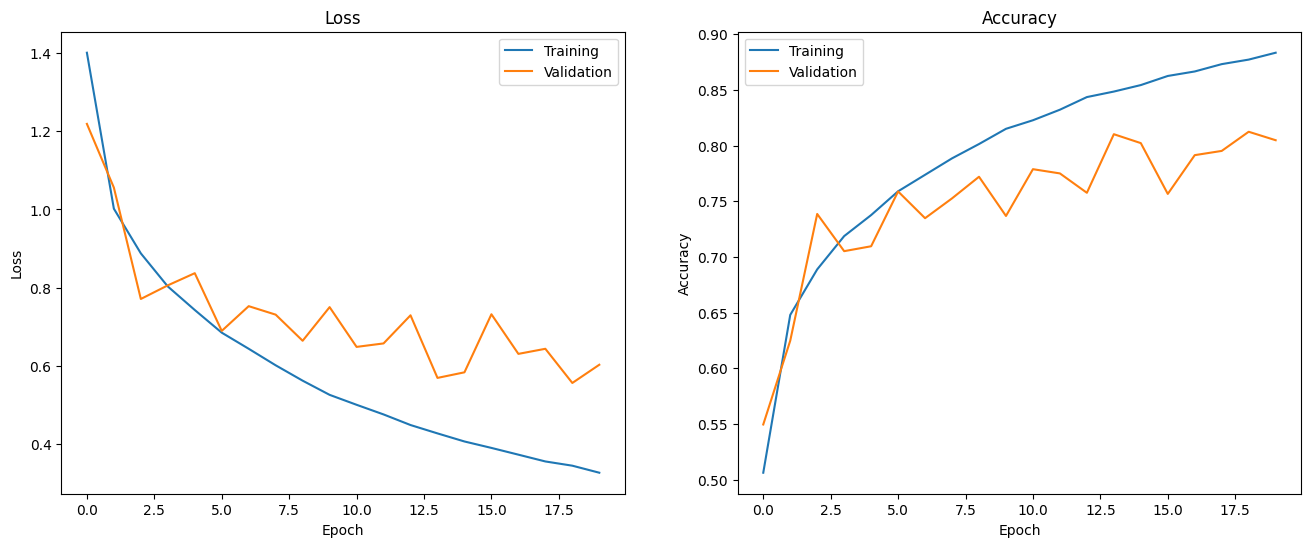

In [21]:
# Visualize the learning curves
##### YOUR CODE STARTS #####
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
##### YOUR CODE ENDS #####

In [22]:
# Report the properties
###### YOUR CODE STARTS #####
train_loss3, train_acc3 = model3.evaluate(X_train3, y_train)
test_loss3, test_acc3 = model3.evaluate(X_test3, y_test)

start_inference_time = time.time()
_ = model3.predict(X_test3[:1000])
end_inference_time = time.time()
inference_time = (end_inference_time - start_inference_time) / 1000

print(f"Number of parameters: {model3.count_params()}")
print(f"Memory usage for the model parameters: {(model3.count_params() * 4)/(1024**2):.2f} MB")
print(f"Training time: {training_time:.2f}")
print(f"Inference time: {inference_time:.6f}")
print(f"Accuracy on the training set: {train_acc3 * 100:.2f}%")
print(f"Accuracy on the test set: {test_acc3 * 100:.2f}%")
##### YOUR CODE ENDS #####

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9494 - loss: 0.1774
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7886 - loss: 0.6454
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Number of parameters: 1371010
Memory usage for the model parameters: 5.23 MB
Training time: 201.49
Inference time: 0.001370
Accuracy on the training set: 93.52%
Accuracy on the test set: 78.91%


<font color='red'> **(d)** Summarise all key properties (such as number of parameters and memory usage) of all three models in a single neat table! Also, additionally add a figure with all three pairs of learning curves (perhaps, using a different panel for each pair of curves). Explain how changes in the architecture affected the behaviour of all three models during training and inference. Which model would you choose for real-world use? Feel free to discuss different use cases. (**0.5 points**)
</font>

<font color='red'>  Answer to **(d)**: </font>



*   Model 3:  
              Number of parameters: 1371010
              Memory usage for the model parameters: 5.23 MB

*   Model 2:
              Number of parameters: 1371010
              Memory usage for the model parameters: 5.23 MB

*   Model 1:  
              Number of parameters: 731910
              Memory usage for the model parameters: 2.79 MB

Observations:

Model 2 and Model 3 have the same number of parameters and memory usage, suggesting they might have similar architectures with the same number of neurons in each layer.
Model 1 is significantly smaller in terms of both parameters and memory usage, likely due to a simpler architecture with fewer neurons or layers.

Choosing the Best Model:

The optimal model depends on several factors:

Task Complexity:
For simpler tasks, Model 1 might be sufficient. For more complex tasks, Model 2 or Model 3 could be better.

Computational Resources:
If memory or computational power is limited, Model 1 might be preferable.

Real-World Constraints:
For real-time applications, inference time might be a critical factor.



## Homework exercise 3 (2 points): Create your own dataset and build a CNN model using fast.ai API
<font color='red'> In this exercise, you have a chance to test if CNN can distinguish between images of your favourite objects. </font>

In [23]:
!pip install fastai==1.0.61

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 6.2 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19173 sha256=6679b2081abfbaac2cd09395c8b9d9ce71f4831f012382e9f6252aba43a0a5d7
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.17
    Uninstalling fastai-2.7.17:
      Successfully uninstalled fastai-2.7.17


In [24]:
from fastai.vision import *
from fastai.metrics import error_rate

from pathlib import Path
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

from urllib.request import urlopen

<font color='red'> **(a)** Create your own dataset with two or more classes using the same approach we used in the class. But this time choose classes yourself. **(1 point)** </font>

In [25]:
from google.colab import files
uploaded = files.upload()

Saving zebra.csv to zebra.csv
Saving donkey.csv to donkey.csv
Saving horse.csv to horse.csv


In [26]:
##### YOUR CODE STARTS #####
folder = 'zebra'
file = 'zebra.csv'

path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'donkeys'
file = 'donkey.csv'

path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'horses'
file = 'horse.csv'

path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


folder = 'donkeys'
dest = path/folder
download_images('donkey.csv', dest, max_pics=600)

folder = 'zebra'
dest = path/folder
download_images('zebra.csv', dest, max_pics=100)

folder = 'horses'
dest = path/folder
download_images('horse.csv', dest, max_pics=600)


##### YOUR CODE ENDS #####

horses
zebra
donkeys


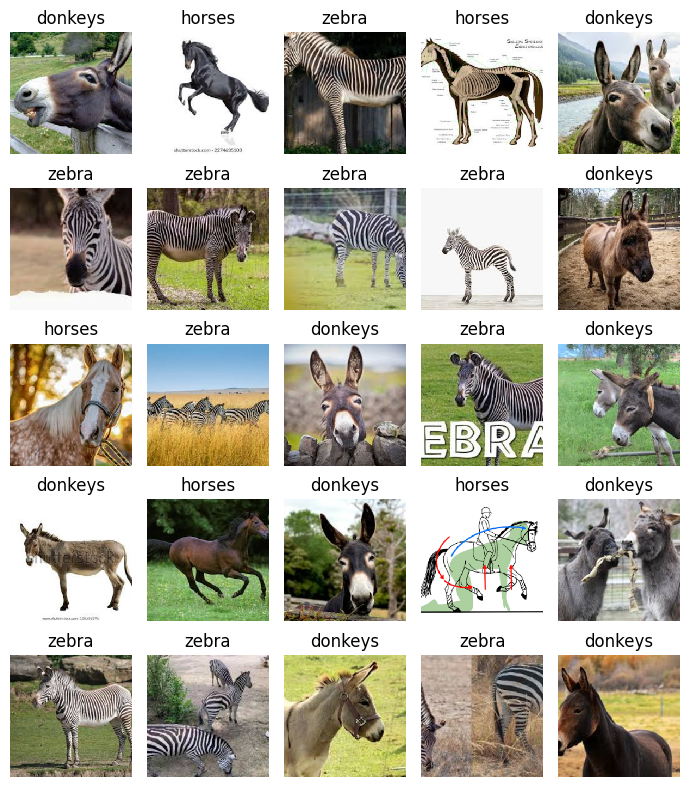

In [27]:
# add more cells as necessary
classes = ["horses", "zebra", "donkeys"]
def verify_image(fn: str, min_width: int, min_height: int):
  try:
    im = Image.open(fn)
    im.load()
    width, height = im.size
    if width < min_width or height < min_height:
      return False
    return True
  except Exception as e:
    print(e)
    return False

def verify_images(fns: Path):
    image_files = get_image_files(fns)
    for img_file in image_files:
      if not verify_image(img_file, 100, 100):
        print(f"Corrupted image found and deleted: {img_file}")
        img_file.unlink()

for c in classes:
  print(c)
  verify_images(path/c)

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,size=224, num_workers=4).normalize(imagenet_stats)
data.classes
data.show_batch(rows=5, figsize=(7,8))

<font color='red'> **(b)** train a neural network on images you have acquired **(0.5 points)** </font>

In [28]:
##### YOUR CODE STARTS #####
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)
##### YOUR CODE ENDS #####

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 87.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.626184,0.735330,0.217391,00:07
1,1.134154,0.317702,0.086957,00:01
2,0.803405,0.308870,0.086957,00:01
3,0.606616,0.297446,0.065217,00:01


Plot the confusion matrix to make sure that you model has learned something:

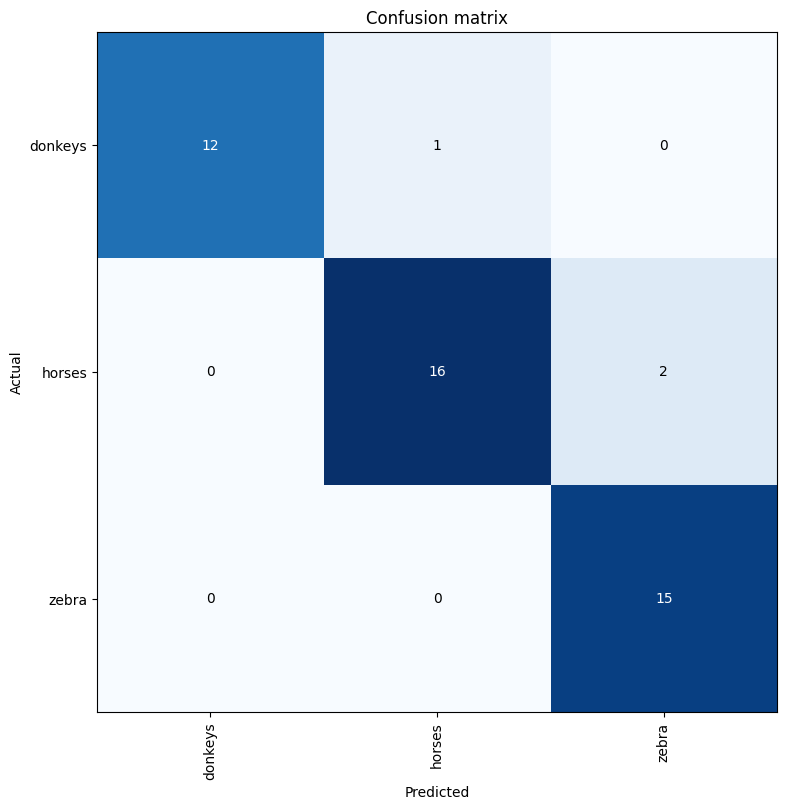

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

<font color='red'> **(c)** Test your model on one or more images from the internet that represent classes you have chosen, but unlikely to be in the training data (you can change your search query). Print out class probabilities for one of these test images. **(0.5 points)** </font>

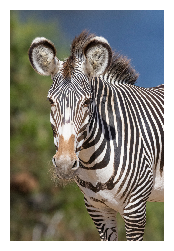

In [30]:
##### YOUR CODE STARTS #####
from urllib.request import urlopen, Request
from PIL import Image
# from fastai.vision import open_image

img_url = "https://therevelator.org/wp-content/uploads/2023/05/Grevys-Zebra-closeup.jpg"
req = Request(img_url, headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(urlopen(req))
img = open_image(urlopen(req))
img.show()
##### YOUR CODE ENDS #####
##### YOUR CODE ENDS #####

In [31]:
# What are the probabilities of different classes for this image?
##### YOUR CODE STARTS #####
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)
##### YOUR CODE ENDS #####

zebra


# Bonus exercises
*(NB, these are optional exercises!)*

## Bonus exercise 1 (2 bonus points):

<font color='red'> [Stable Diffusion](https://stability.ai/blog/stable-diffusion-announcement) model has been recently shown to produce trully impressive results in image generation. Let's explore some of its power in this auxiliarly exercise. Use Stable Diffusion model from this [colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb?hl=en). Generate several tricky images to test the model you trained in the exercise 3. Report the images that you have generated with Stable Diffusion, prompt that you have used for generating them, the number of iterations that you used to generate images and the classification results from your CNN model. Shortly summarise the results you have obtained. </font>

## Bonus exercise 2 (2 bonus points):

<font color='red'> [Pytorch](https://pytorch.org/) is another widely used and deeply loved deep learning library. In this task, you will get a chance to try it out. Firstly, re-implement one of the CNNs you were working with in EX 2 (or you can try a different architecture) in Pytorch. Train and validate the model on the dataset you collected in EX3. Secondly, use a ResNet model from [torchhub](https://pytorch.org/docs/stable/hub.html) and train it on the same data. Compare the results of these two models and the one from fastai library.

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions:
* how much time did you spend on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments:

# <font color='red'>  End of the homework. Please don't delete this cell.</font>